# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")

df = pd.read_csv(filename, header=0)
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# Create dataframe copy to analyze for missing NaN values 
# in the subset of data from 2017 (the most recent year to focus on)
df_copy = df.drop(df[df.year < 2017].index)

In [5]:
# Determine missing values
nan_count = np.sum(df_copy.isnull(), axis = 0)
nan_count

# Save the features that don't have too many missing values
# to prevent replacing with non-representative values
features_to_delete = df_copy.columns[nan_count > 10]
df.drop(columns=features_to_delete, inplace=True)
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Positive affect,Negative affect,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.517637,0.258195,1.774662,0.476600,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.583926,0.237092,1.722688,0.391362,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.618265,0.275324,1.878622,0.394803,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.611387,0.267175,1.785360,0.465942,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.710385,0.267919,1.798283,0.475367,0.344540


In [6]:
# fill missing values with values from previous year
df = df.fillna(method='ffill', axis=1)
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Positive affect,Negative affect,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.72359,7.16869,0.450662,49.2097,0.718114,0.181819,0.517637,0.258195,1.77466,0.4766,0.4766
1,Afghanistan,2009,4.40178,7.33379,0.552308,49.6244,0.678896,0.203614,0.583926,0.237092,1.72269,0.391362,0.441906
2,Afghanistan,2010,4.75838,7.38663,0.539075,50.009,0.600127,0.13763,0.618265,0.275324,1.87862,0.394803,0.327318
3,Afghanistan,2011,3.83172,7.41502,0.521104,50.3673,0.495901,0.175329,0.611387,0.267175,1.78536,0.465942,0.336764
4,Afghanistan,2012,3.78294,7.51713,0.520637,50.7093,0.530935,0.247159,0.710385,0.267919,1.79828,0.475367,0.34454


In [7]:
# Remove all years other than 2017
df.drop(df.loc[df['year']!=2017].index, inplace=True)
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Positive affect,Negative affect,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
9,Afghanistan,2017,2.66172,7.46014,0.49088,52.3395,0.427011,-0.10634,0.496349,0.371326,1.45405,0.546283,0.286599
19,Albania,2017,4.63955,9.37372,0.637698,69.0517,0.749611,-0.0351404,0.669241,0.333884,2.6821,0.578096,0.410488
25,Algeria,2017,5.24891,9.54024,0.806754,65.6992,0.43667,-0.19467,0.64198,0.28871,2.03976,0.388607,0.527556
41,Argentina,2017,6.03933,9.84352,0.906699,67.5387,0.831966,-0.1863,0.809423,0.291717,2.40933,0.39894,0.394176
53,Armenia,2017,4.28774,9.03471,0.697925,65.1257,0.613697,-0.132166,0.625014,0.437149,2.32538,0.542333,0.478877


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


I am building models to predict the life ladder values for different countries based on the most relevant five features I determine using feature selection and find the best performing model.

In [8]:
y = df['Life Ladder']
# don't include the label, the country (non-numeric), and year (which is same for every row - 2017)
X = df.drop(columns=['Life Ladder', 'country', 'year'], axis=1)

In [9]:
# change object types to floats
X = X.astype('float')
y = y.astype('float')
print(X.dtypes)
print(y.dtypes)

Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Positive affect                                             float64
Negative affect                                             float64
Standard deviation of ladder by country-year                float64
Standard deviation/Mean of ladder by country-year           float64
gini of household income reported in Gallup, by wp5-year    float64
dtype: object
float64


In [10]:
# make data subsets for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.30, random_state=1234)

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Note that k=5 is specifying that we want the top 5 features
selector = SelectKBest(f_regression, k=5)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]

print("Best 5 features:")
print(top_5_features)

# Create new training and test data for features
new_X_train = X_train[top_5_features]
new_X_test = X_test[top_5_features]


# Initialize a DecisionTreeRegressor model object with the default value of hyperparameter C 
# The model object should be named 'model' with default hyperparameters
model = DecisionTreeRegressor()

# Fit the model to the new training data
model.fit(new_X_train, y_train)

# Use the predict() method to use your model to make predictions on the new test data 
# Save the values of the second column to a list called 'proba_predictions'
proba_predictions = model.predict(new_X_test)
    
# Compute the rmse and r2
dt_rmse = mean_squared_error(y_test, proba_predictions, squared=False)
dt_r2 =  r2_score(y_test, proba_predictions)


print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

Best 5 features:
Index(['Log GDP per capita', 'Healthy life expectancy at birth',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')
[DT] Root Mean Squared Error: 0.7748912107787109
[DT] R2: 0.5083277322048468


## Training Four Regression Models  Using The Stacking Ensemble Method To See If Performance Is Better Than The DecisionTreeRegressor Model Alone

In [12]:

estimators = [("DT", DecisionTreeRegressor()),
              ("RF", RandomForestRegressor()),
              ("GBDT", GradientBoostingRegressor()),
              ("LR", LinearRegression())
             ]

In [13]:
stacking_model = StackingRegressor(estimators=estimators, cv=5, passthrough=False)

In [14]:
rmse = -1 * cross_val_score(stacking_model, new_X_train, y_train, cv=3, scoring = 'neg_root_mean_squared_error')
rmse_avg = rmse.mean()

print('average score: {}'.format(rmse_avg))

average score: 0.5014303927144103


In [15]:
# improve models by finding the best hyperparameter values
params = {
    "DT__max_depth": [2, 4, 8],
    "GBDT__n_estimators":[100,300]
    
}

stack_grid = GridSearchCV(stacking_model, params, cv=3, verbose=4, scoring='neg_root_mean_squared_error', refit=True, n_jobs=-1)
stack_grid.fit(new_X_train, y_train)
print(stack_grid.best_params_)
stack_grid.cv_results_['mean_test_score']


print("best parameters:", stack_grid.best_params_)

rmse_stack_cv = -1*stack_grid.best_score_
print("[STACK] RMSE for the best model is : {:.2f}".format(rmse_stack_cv))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  18 | elapsed:    6.6s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    8.8s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   10.3s finished


{'DT__max_depth': 4, 'GBDT__n_estimators': 100}
best parameters: {'DT__max_depth': 4, 'GBDT__n_estimators': 100}
[STACK] RMSE for the best model is : 0.50


In [16]:
estimators_best = [("DT", DecisionTreeRegressor(max_depth=stack_grid.best_params_['DT__max_depth'])),
              ("RF", RandomForestRegressor()),
              ("GBDT", GradientBoostingRegressor(n_estimators=stack_grid.best_params_['GBDT__n_estimators'])),
              ("LR", LinearRegression())
             ]

In [17]:
stacking_best_model = StackingRegressor(estimators=estimators_best)
stacking_best_model.fit(new_X_train, y_train)

StackingRegressor(cv=None,
                  estimators=[('DT',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=4,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                                   

In [18]:
# 1. Use predict() to test use the fitted model to make predictions on the test data
stacking_best_pred = stacking_best_model.predict(new_X_test)

# 2. Compute the RMSE using mean_squared_error()
rmse = mean_squared_error(y_test, stacking_best_pred, squared=False)

# 3. Compute the R2 score using r2_score()
r2 = r2_score(y_test, stacking_best_pred)

           
print('Root Mean Squared Error: {0}'.format(rmse))
print('R2: {0}'.format(r2))

Root Mean Squared Error: 0.4256362078197627
R2: 0.851655525763441


## Visualizing the Performance in a Bar Graph 

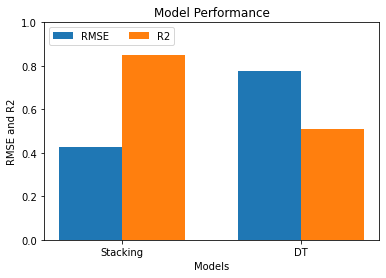

In [19]:
RMSE_Results = [rmse, dt_rmse]
R2_Results = [r2, dt_r2]
labels = ['Stacking', 'DT']

rg = np.arange(2)
width = 0.35

# 1. Create bar plot with RMSE results
plt.bar(rg, RMSE_Results, width, label="RMSE")

# 2. Create bar plot with R2 results
plt.bar(rg+width, R2_Results, width, label='R2')

# 3. Call plt.xticks() to add labels under the bars indicating which model the pair of RMSE 
# and R2 bars correspond to
plt.xticks(rg + width/2, labels)

# 4. Label the x and y axis of the plot: the x axis should be labeled "Models" and the y axis
# should be labeled "RMSE and R2"
plt.xlabel("Models")
plt.ylabel("RMSE and R2")

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

## Analysis

Based on the graph, the stacking ensemble model performs significantly better than the decision tree model. The stacking ensemble model has a lower RMSE value and a higher R2 value than the decision tree value, and lower RMSE values indicate less error between the predicted values against the actual values while higher R2 values reflect how well the model fits the data.